In [1]:
# Dependencies
import tweepy
from textblob import TextBlob
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declare variables for Authentication

consumer_key ='bXWxLAweEkINBkuCqFP2eI76t'
consumer_key_secret = 'GqSrUfAcWcS5w0OgJLD1TBQk1nBvfu6bwntzvknulXONm2jG0E'

access_token = '2483989434-2n5nIvgjDLKAfie5bjWPpyXEny1gpJnftHvZ9HJ'
access_token_secret = 'quA5qw8xGpYrORRBN5cjaGKsoqcoLlXAhMARGk8i6WUjC'

In [3]:
# Authenticating

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# Search for Tweets. Update the variable to anything that has to analyzed.
search_tweet = 'Oppenheimer'

# List to store sentiments
sentiments = []

#Determine how old the tweets have to be picked
today = datetime.now().strftime('%Y-%m-%d')
n_days_ago = (datetime.now() - timedelta(days = 3)).strftime('%Y-%m-%d')

# Limit the number of tweets by passing value to items()
for i in tweepy.Cursor(api.search, q = search_tweet, since= n_days_ago, until= today).items(110):
    tweet = TextBlob(i.text)
    sentiments.append(tweet.sentiment.polarity)

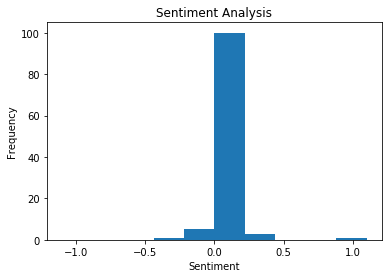

In [5]:
# Sentiment Analysis
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.hist(sentiments, range = (-1.1, 1.1), bins = 10)
plt.show()

In [6]:
# Check the Sentiment
# if polarity is >= 0.2, then it is positive
# if polarity <= -0.2 , then it is negative
# Others are neutral

positive_count_percent = len([i for i in sentiments if i >= 0.2]) * 100 /float(len(sentiments))
negative_count_percent = len([i for i in sentiments if i <= -0.2]) * 100 /float(len(sentiments))
neutral_count_percent = len([i for i in sentiments if -0.2 < i < 0.2]) * 100 /float(len(sentiments))

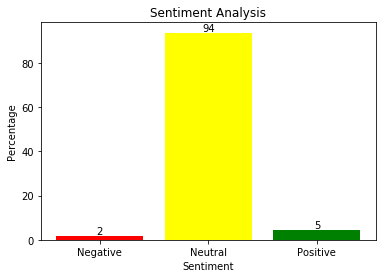

In [7]:
# Bar graph to depict Sentiment analysis
Y_Sentiment_Percent = [negative_count_percent, neutral_count_percent, positive_count_percent]
X_Sentiment = ['Negative', 'Neutral', 'Positive']
sentiment_bar = plt.bar(X_Sentiment, Y_Sentiment_Percent, color = ['red', 'yellow', 'green'])
for i in sentiment_bar:
        height = i.get_height()
        plt.text(i.get_x() + i.get_width()/2., height, '%d' % round(height), ha='center', va='bottom')

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.show()